In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [4]:
os.listdir('../../../WN18')

['relation2id.txt', 'valid.txt', 'test.txt', 'entity2id.txt', 'train.txt']

In [5]:
data_path = '../../../WN18/'

In [6]:
vec_path = '../'

In [20]:
with open(data_path+'train.txt', 'r') as f:
    data = f.readlines()

In [26]:
data[0]

'03964744\t04371774\t_hyponym\n'

In [34]:
relation_map_h = {}
relation_map_t = {}
for i in data:
    head, tail, rel = i.split('\t')
    if rel in relation_map_h and head in relation_map_h[rel]:
        if tail in relation_map_h[rel][head]:
            print(head, tail, rel)
        relation_map_h[rel][head] += [tail]
    elif rel in relation_map_h:
        relation_map_h[rel].update({head:[tail]})
    else:
        relation_map_h[rel] = {head:[tail]}
    
    if rel in relation_map_t and tail in relation_map_t[rel]:
        if head in relation_map_t[rel][tail]:
            print(head, tail, rel)
        relation_map_t[rel][tail] += [head]
    elif rel in relation_map_t:
        relation_map_t[rel].update({tail:[head]})
    else:
        relation_map_t[rel] = {tail:[head]}

In [35]:
relation_head_cnt = {}
for key, values in relation_map_h.items():
    cnt = 0
    for _, tails in values.items():
        cnt += len(tails)
    relation_head_cnt[key] = cnt

# WN relation analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

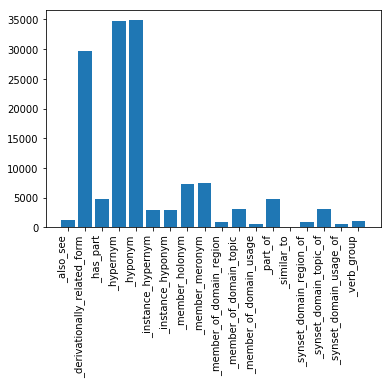

In [41]:
plt.bar(relation_head_cnt.keys(), relation_head_cnt.values())
plt.xticks(rotation=90)
# relation_map_h